In [2]:
import pandas as pd
df = pd.read_json (r'C:\Users\katak\PycharmProjects\linguistics\new_dataset.json')

In [3]:
df.head(3)

,Disney_Period,Text,Speaker_Status,Movie,Speaker,Year,UTTERANCE_NUMBER,tokens,pos,len,word_order
0,EARLY,slave in the magic mirror come from the farthe...,NON-P,Snow White,queen,1937,1,"[{'word': 'slave', 'pos': 'NOUN', 'lemma': 'sl...","{'NOUN': 7, 'VERB': 5, 'ADJ': 1, 'PRON': 1}",23,"[SV, V, V]"
1,EARLY,"what wouldst thou know, my queen ?",NON-P,Snow White,mirror,1937,2,"[{'word': 'wouldst', 'pos': 'ADJ', 'lemma': 'w...","{'ADJ': 1, 'NOUN': 2, 'VERB': 1}",6,[OSV]
2,EARLY,"magic mirror on the wall, who is the fairest o...",NON-P,Snow White,queen,1937,3,"[{'word': 'magic', 'pos': 'NOUN', 'lemma': 'ma...","{'NOUN': 3, 'ADJ': 1}",12,[V]


In [16]:
from pandas import Series

df2 = df[["Speaker_Status", "word_order"]]
s = df2['word_order'].apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'word_order2'
del df2['word_order']
#df2.join(s)
#df2.head(3)
df2 = df2.join(s, lsuffix='_caller', rsuffix='_other')

<AxesSubplot:title={'center':'Порядок слов в предложениях челяди'}, xlabel='Порядок слов', ylabel='Кол-во реплик'>

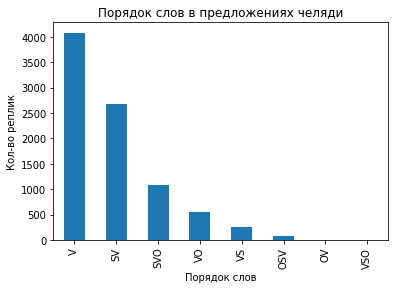

In [32]:
df3 = df2[df2["Speaker_Status"] == "NON-P"]
df3["word_order2"].value_counts()
df3["word_order2"].value_counts().plot.bar(
    title="Порядок слов в предложениях челяди",
    xlabel="Порядок слов",
    ylabel="Кол-во реплик"
)

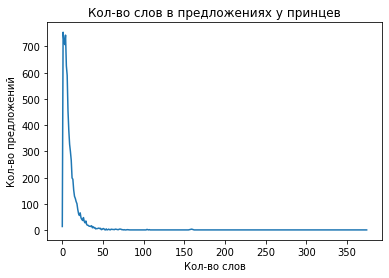

In [25]:
df4 = df[["Speaker_Status", "len"]]
df5 = df4[df4["Speaker_Status"] == "PRINCE"]
df4["len"].value_counts().sort_index().plot(
    title="Кол-во слов в предложениях у принцев", 
    xlabel="Кол-во слов",
    ylabel="Кол-во предложений"
);

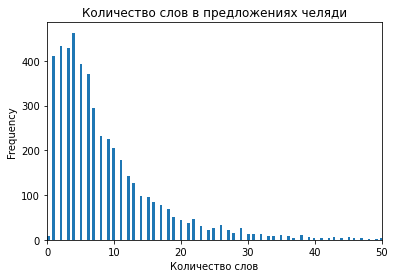

In [37]:
df4 = df[["Speaker_Status", "len"]]
df5 = df4[df4["Speaker_Status"] == "NON-P"]
lenn = df5["len"]
lenn.plot.hist(bins=1000, xlim=(0, 50), title="Количество слов в предложениях челяди")
plt.xlabel("Количество слов");
#df5["UTTERANCE_NUMBER"].value_counts().plot.bar(
#    title="Количество предложений на реплику принца",
#    xlabel="Количество реплик",
#    ylabel="Кол-во предложений"
#)
